# CSCE 554 HW 5
# Marvin Newlin
# 27 Aug 19

In [69]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
import seaborn
import probscale
alpha = 0.05

## 6.2

### Answer
In a $2^k$ factorial design there are $2^k(n-1)$ error degrees of freedom. Thus, for a $2^3$ factorial design with $n=2$ replicates, there are $8(2-1) = 8$ error degrees of freedom. Thus, the answer is $\textbf{e}$.

## 6.5, a, b, and d

### a

 	Effect Estimate	Sum of Squares
A	     0.333	     0.667
B	    11.333	   770.667
C	     6.833	   280.167
AB	    -1.667	    16.667
AC	    -8.833	   468.167
BC	    -2.833	    48.167
ABC	    -2.167	    28.167


C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


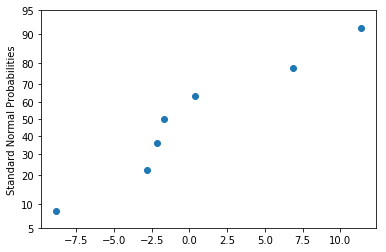

Sum of Squares  Degrees of Freedom Mean Square         F0  \
Cutting Speed (A)        0.666667                 1.0    0.666667  0.0220994   
Tool Geometry (B)      770.666667                 1.0     770.667     25.547   
Cutting Angle (C)      280.166667                 1.0     280.167    9.28729   
AB                      16.666667                 1.0     16.6667   0.552486   
AC                     468.166667                 1.0     468.167    15.5193   
BC                      48.166667                 1.0     48.1667    1.59669   
ABC                     28.166667                 1.0     28.1667   0.933702   
Error                  482.666667                16.0     30.1667              
Total                 2095.333333                23.0                          

                  F Threshold      p-value  
Cutting Speed (A)       4.494      0.88368  
Tool Geometry (B)       4.494  0.000117288  
Cutting Angle (C)       4.494   0.00767868  
AB                      4.494     0.468078  
AC                      4.494   0.00117221  
BC                      4.494     0.224475  
ABC                     4.494     0.348282  
Error                                       
Total

In [70]:
ones = np.array([22,31,25])
a = np.array([32,43,29])
b = np.array([35,34,50])
ab = np.array([55,47,46])
c = np.array([44,45,38])
ac = np.array([40,37,36])
bc = np.array([60,50,54])
abc = np.array([39,41,47])



n = 3
k = 3
alpha = 0.05

total = np.array([ones, a, b, c, ab, ac, bc, abc])
total_mean = np.mean(total)

# Contrasts
contrast_A =  np.sum(a - ones + ab - b + ac - c + abc - bc)
contrast_B =  np.sum(b - ones - a + ab - ac - c + bc + abc)
contrast_C =  np.sum(c + ac + bc + abc - ones - a - b -ab)
contrast_AB = np.sum(ab - a - b + ones + abc - bc - ac + c)
contrast_AC = np.sum(ones - a + b - ab - c + ac - bc + abc)
contrast_BC = np.sum(ones + a - b - ab - c - ac + bc + abc)
contrast_ABC= np.sum(abc - bc - ac + c - ab + b + a - ones)

# Sum of Squares
SSA = (contrast_A**2)/(n*np.power(2,k))
SSB = (contrast_B**2)/(n*np.power(2,k))
SSAB = (contrast_AB**2)/(n*np.power(2,k))
SSC = (contrast_C**2)/(n*np.power(2,k))
SSAC = (contrast_AC**2)/(n*np.power(2,k))
SSBC = (contrast_BC**2)/(n*np.power(2,k))
SSABC = (contrast_ABC**2)/(n*np.power(2,k))
SST = np.sum(np.square(total - total_mean))
SSE = SST - SSA - SSB - SSAB - SSC - SSAC - SSBC - SSABC
sum_squares = np.array([SSA, SSB, SSC, SSAB, SSAC, SSBC, SSABC, SSE, SST])

effect_A = contrast_A/(4*n)
effect_B = contrast_B/(4*n)
effect_C = contrast_C/(4*n)
effect_AB = contrast_AB/(4*n)
effect_AC = contrast_AC/(4*n)
effect_BC = contrast_BC/(4*n)
effect_ABC = contrast_ABC/(4*n)
effects = np.array([effect_A, effect_B, effect_C, effect_AB, effect_AC, effect_BC, effect_ABC])

effect_names = ['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']
print(" \t{:10s}\t{:10s}".format("Effect Estimate", "Sum of Squares"))
for x in range(7):
    print("{}\t{:-10.3f}\t{:-10.3f}".format(effect_names[x], effects[x], sum_squares[x]))

# Normplot of effects   

fig = plt.figure(figsize=(6,4))
probscale.probplot(effects,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.show()

# Degrees of Freedom
DF_A = 1
DF_B = 1
DF_AB = 1
DF_C = 1 
DF_AC = 1
DF_BC = 1
DF_ABC = 1
DF_T = n*np.power(2,k)-1
DF_E = np.power(2,k)*(n-1)
DF = np.array([DF_A, DF_B, DF_C, DF_AB, DF_AC, DF_BC, DF_ABC, DF_E, DF_T])

# Mean Squares
MSA = SSA/DF_A
MSB = SSB/DF_B
MSAB = SSAB/DF_AB
MSC = SSC/DF_C
MSAC = SSAC/DF_AC
MSBC = SSBC/DF_BC
MSABC = SSABC/DF_ABC
MSE = SSE/DF_E
mean_squares = np.array([MSA, MSB, MSC, MSAB, MSAC, MSBC, MSABC, MSE,0])

# F0 vals
F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE
F0_C = MSC/MSE
F0_AC = MSAC/MSE
F0_BC = MSBC/MSE
F0_ABC = MSABC/MSE
f_vals = np.array([F0_A, F0_B, F0_C, F0_AB, F0_AC, F0_BC, F0_ABC, 0, 0])

# F threshold vals
f_crit_a = stats.f.ppf(1-alpha,DF_A,DF_E)
f_crit_b = stats.f.ppf(1-alpha,DF_B,DF_E)
f_crit_ab = stats.f.ppf(1-alpha,DF_AB,DF_E)
f_crit_c = stats.f.ppf(1-alpha,DF_C,DF_E)
f_crit_ac = stats.f.ppf(1-alpha,DF_AC,DF_E)
f_crit_bc = stats.f.ppf(1-alpha,DF_BC,DF_E)
f_crit_abc = stats.f.ppf(1-alpha,DF_ABC,DF_E)
f_crits = np.array([f_crit_a, f_crit_b, f_crit_c, f_crit_ab,  f_crit_ac, f_crit_bc, f_crit_abc, 0, 0])

# P values
p_val_A = 1 - stats.f.cdf(F0_A, DF_A,DF_E)
p_val_B = 1 - stats.f.cdf(F0_B, DF_B,DF_E)
p_val_AB = 1 - stats.f.cdf(F0_AB, DF_AB,DF_E)
p_val_C = 1 - stats.f.cdf(F0_C, DF_C,DF_E)
p_val_AC = 1 - stats.f.cdf(F0_AC, DF_AC,DF_E)
p_val_BC = 1 - stats.f.cdf(F0_BC, DF_BC,DF_E)
p_val_ABC = 1 - stats.f.cdf(F0_ABC, DF_ABC,DF_E)
pvals = np.array([p_val_A, p_val_B, p_val_C, p_val_AB, p_val_AC, p_val_BC, p_val_ABC, 0,0])

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['Cutting Speed (A)', 'Tool Geometry (B)', 'Cutting Angle (C)', 'AB', 'AC', 'BC', 'ABC', 'Error', 'Total'], 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)

### Answer (a)

Examining the effects we see that $B,C$ and $AC$ are very large.

### Answer (b)

Examining the results of the ANOVA, the significant factors are $B,C$, and $AC$. This confirms what we saw in part (a).


### d

C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


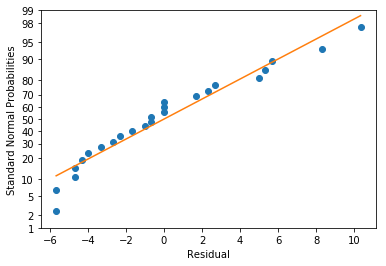

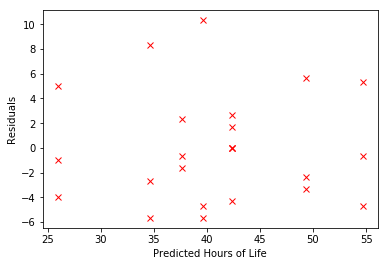

In [71]:
# Calculate residuals
# Residuals = y_hat + effect * level for all main factor effects
treatment_means = np.mean(total, axis=1)
residuals = np.zeros((total.shape))
effects_main = effects[:3]/2



for i in range(np.power(2,k)-1):
    residuals[i] = total[i] - total[i].mean()


probscale.probplot(residuals,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=True)
plt.xlabel("Residual")
plt.show()

# Plot residuals versus fits
for j in range(3):
    plt.plot(treatment_means, residuals[:,j], 'rx')
plt.xlabel("Predicted Hours of Life")
plt.ylabel("Residuals")
plt.show()


#### Answer

Examining the residuals, we see that there are some outliers around -6, but for the most part the normality assumption seems to hold. Additionally the residuals seem to have pretty constant variance.

## 7.1

In [72]:
## 7.1 data is the same as data from 6.5. 

block1 = total[:,0]
block2 = total[:,1]
block3 = total[:,2]

SSBLOCKS = (np.square(block1.sum()) + np.square(block2.sum()) + np.square(block3.sum()))/(np.power(2,k)) - (np.square(total.sum())/(n*np.power(2,k)))

DF_BLOCKS = 2
DF_E = DF_E - 2
vals_df.loc['Error', 'Sum of Squares'] = vals_df.loc['Error', 'Sum of Squares'] - SSBLOCKS

MSE = vals_df.loc['Error', 'Sum of Squares']/DF_E

MS_BLOCKS = SSBLOCKS/DF_BLOCKS

F0_BLOCKS = MS_BLOCKS/MSE
p_val_BLOCKS = 1 - stats.f.cdf(F0_BLOCKS, DF_BLOCKS,DF_E)
f_crit_blocks = stats.f.ppf(1-alpha,DF_BLOCKS,DF_E)
f_crit_new = stats.f.ppf(1-alpha,DF_A,DF_E)
vals_df.loc['Error','Mean Square'] = MSE
vals_df.loc['Error','Degrees of Freedom'] = DF_E
vals_df.loc['Cutting Speed (A)':'ABC','F Threshold'] = f_crit_new
vals_df.loc['Blocks'] = [SSBLOCKS, DF_BLOCKS, MS_BLOCKS, F0_BLOCKS, f_crit_blocks, p_val_BLOCKS]
display(vals_df)

Sum of Squares  Degrees of Freedom Mean Square          F0  \
Cutting Speed (A)        0.666667                 1.0    0.666667   0.0220994   
Tool Geometry (B)      770.666667                 1.0     770.667      25.547   
Cutting Angle (C)      280.166667                 1.0     280.167     9.28729   
AB                      16.666667                 1.0     16.6667    0.552486   
AC                     468.166667                 1.0     468.167     15.5193   
BC                      48.166667                 1.0     48.1667     1.59669   
ABC                     28.166667                 1.0     28.1667    0.933702   
Error                  482.083333                14.0     34.4345               
Total                 2095.333333                23.0                           
Blocks                   0.583333                 2.0    0.291667  0.00847018   

                  F Threshold      p-value  
Cutting Speed (A)     4.60011      0.88368  
Tool Geometry (B)     4.60011  0.000117288  
Cutting Angle (C)     4.60011   0.00767868  
AB                    4.60011     0.468078  
AC                    4.60011   0.00117221  
BC                    4.60011     0.224475  
ABC                   4.60011     0.348282  
Error                                       
Total                                       
Blocks                3.73889     0.991571

### Answer

Examining the ANOVA results of the blocking, we see that the blocks have no effect. The $F_0$ value is 0.008, far lower than the threshold value of 3.739. Additionally the $p$-value is 0.996. The other results hold from the previous problem with $B,C$, and $AC$ being significant.

## 6.11, a, b, and e

 	Effect Estimate	Sum of Squares
A	    -9.062	   657.031
B	    -1.312	    13.781
AB	     4.062	   132.031
C	    -2.688	    57.781
AC	     0.688	     3.781
BC	    -0.562	     2.531
ABC	    -5.188	   215.281
D	     3.938	   124.031
AD	    -2.188	    38.281
BD	    -0.188	     0.281
ABD	     4.688	   175.781
CD	     1.688	    22.781
ACD	    -0.938	     7.031
BCD	    -0.938	     7.031
ABCD	     2.438	    47.531


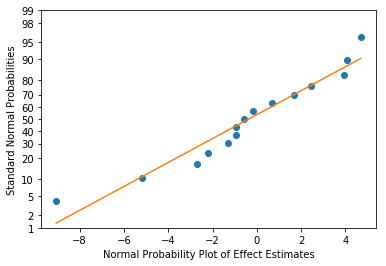

Sum of Squares  Degrees of Freedom  Mean Square         F0 F Threshold  \
A           657.03125                 1.0   657.031250    85.8163       4.494   
B            13.78125                 1.0    13.781250        1.8       4.494   
AB          132.03125                 1.0   132.031250    17.2449       4.494   
C            57.78125                 1.0    57.781250    7.54694       4.494   
AC            3.78125                 1.0     3.781250   0.493878       4.494   
BC            2.53125                 1.0     2.531250   0.330612       4.494   
ABC         215.28125                 1.0   215.281250    28.1184       4.494   
D           124.03125                 1.0   124.031250       16.2       4.494   
AD           38.28125                 1.0    38.281250          5       4.494   
BD            0.28125                 1.0     0.281250  0.0367347       4.494   
ABD         175.78125                 1.0   175.781250    22.9592       4.494   
CD           22.78125                 1.0    22.781250    2.97551       4.494   
ACD           7.03125                 1.0     7.031250   0.918367       4.494   
BCD           7.03125                 1.0     7.031250   0.918367       4.494   
ABCD         47.53125                 1.0    47.531250    6.20816       4.494   
Error       122.50000                16.0     7.656250                          
Total      1627.46875                31.0    52.498992                          

           p-value  
A      7.87486e-08  
B         0.198445  
AB      0.00074909  
C        0.0143171  
AC        0.492302  
BC        0.573296  
ABC    7.14564e-05  
D      0.000979357  
AD       0.0399447  
BD        0.850417  
ABD    0.000199729  
CD        0.103793  
ACD       0.352162  
BCD       0.352162  
ABCD     0.0240766  
Error               
Total

In [73]:
one = np.array([90, 93])
a = np.array([74, 78])
b = np.array([81, 85])
ab = np.array([83, 80])
c = np.array([77, 78])
ac = np.array([81, 80])
bc = np.array([88, 82])
abc = np.array([73, 70])
d = np.array([98, 95])
ad = np.array([72, 76])
bd = np.array([87, 83])
abd = np.array([85, 86])
cd = np.array([99, 90])
acd = np.array([79, 75])
bcd = np.array([87, 84])
abcd = np.array([80, 80])

n = 2
k = 4

total = np.array([one, a, b, ab, c, ac, bc, abc,
                  d, ad, bd, abd, cd, acd, bcd, abcd])
total_mean = np.mean(total)

# Contrasts

contrast_A = np.sum(-one + a - b + ab - c + ac - bc + abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_B = np.sum(-one - a + b + ab - c - ac + bc + abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_AB = np.sum(one - a - b + ab + c - ac - bc + abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_C = np.sum(-one - a - b - ab + c + ac + bc + abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_AC = np.sum(one - a + b - ab - c + ac - bc + abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BC = np.sum(one + a - b - ab - c - ac + bc + abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABC= np.sum(-one+ a + b - ab + c - ac - bc + abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrast_D =  np.sum(-one- a - b - ab - c - ac - bc - abc + d + ad + bd + abd + cd + acd + bcd + abcd)
contrast_AD=  np.sum(one - a + b - ab + c - ac + bc - abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_BD = np.sum(one + a - b - ab + c + ac - bc - abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_ABD= np.sum(-one + a + b - ab - c + ac + bc - abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_CD = np.sum(one + a + b + ab - c - ac - bc - abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_ACD = np.sum(-one + a - b + ab + c - ac + bc - abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BCD = np.sum(-one - a + b + ab + c + ac - bc - abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABCD = np.sum(one - a - b + ab - c + ac + bc - abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrasts_all = np.array([contrast_A, contrast_B, contrast_AB, contrast_C, contrast_AC, contrast_BC, contrast_ABC,
                         contrast_D, contrast_AD, contrast_BD, contrast_ABD, contrast_CD, contrast_ACD, contrast_BCD,
                         contrast_ABCD])

# Effects
names = ['A', 'B', 'AB', 'C', 'AC', 'BC', 'ABC', 'D', 'AD', 'BD', 'ABD', 'CD', 'ACD', 'BCD', 'ABCD']
num_effects = np.power(2,k)-1
effects = np.ones(num_effects)
for i in range(num_effects):
    effects[i] = contrasts_all[i]/(n*np.power(2,k-1))

# Sum Squares
num_elements = num_effects+2
sum_squares = np.ones(num_elements) #All effects plus error and total
for i in range(num_effects):
    sum_squares[i] = np.square(contrasts_all[i])/(n*np.power(2,k))
SST = np.sum(np.square(total - total_mean))
SSE = SST - np.sum(sum_squares[0:num_effects])
sum_squares[num_effects] = SSE
sum_squares[num_effects+1] = SST
DF = np.ones(num_elements)
DF[num_effects] = np.power(2,k)*(n-1) # Error DoF
DF[num_effects+1] = n*np.power(2,k)-1 # Total DoF

print(" \t{:10s}\t{:10s}".format("Effect Estimate", "Sum of Squares"))
for x in range(num_effects):
    print("{}\t{:-10.3f}\t{:-10.3f}".format(names[x], effects[x], sum_squares[x]))

# Normplot of effects   

fig = plt.figure(figsize=(6,4))
probscale.probplot(effects,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=True)
plt.xlabel("Normal Probability Plot of Effect Estimates")
plt.show()


# Mean Squares

mean_squares = np.ones(sum_squares.size)
for i in range(num_elements):
    mean_squares[i] = sum_squares[i]/DF[i]

# F Vals & p-vals
f_vals = np.ones(num_elements)
f_vals[num_effects:] = 0

f_crits = np.ones(num_elements)
f_crits[num_effects:] = 0

p_vals = np.ones(num_elements)
p_vals[num_effects:] = 0

MSE = mean_squares[num_effects]
DFE = DF[num_effects]
for i in range(num_effects):
    F0 = mean_squares[i]/MSE
    f_vals[i] = F0
    f_crits[i] = stats.f.ppf(1-alpha,DF[i],DFE)
    p_vals[i] = 1 - stats.f.cdf(F0, DF[i],DFE)

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=['A', 'B', 'AB', 'C', 'AC', 'BC', 'ABC', 'D', 'AD', 'BD', 'ABD', 'CD', 'ACD', 'BCD', 'ABCD', 'Error', 'Total'], 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)

#### Answer (a)

Examining the factor effects we see that $A,AB,ABC,D,ABD$ are the large factor effects.

#### Answer (b)

Examining the ANOVA results, we see that $A,AB,C,ABC,D,AD,ABD,ABCD$ are all significant effects in explaining yield.

### d)

C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


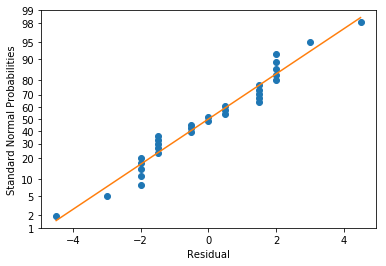

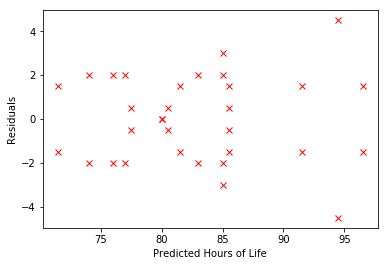

In [74]:
# Calculate residuals
# Residuals = y_hat + effect * level for all main factor effects
treatment_means = np.mean(total, axis=1)
residuals = np.zeros((total.shape))
effects_main = np.array([effects[0]/2, effects[1]/2, effects[3]/2, effects[7]/2]) # A, B, C, and D

for i in range(np.power(2,k)-1):
    residuals[i] = total[i] - total[i].mean()


probscale.probplot(residuals,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=True)
plt.xlabel("Residual")
plt.show()

# Plot residuals versus fits
for j in range(n):
    plt.plot(treatment_means, residuals[:,j], 'rx')
plt.xlabel("Predicted Hours of Life")
plt.ylabel("Residuals")
plt.show()

### e)


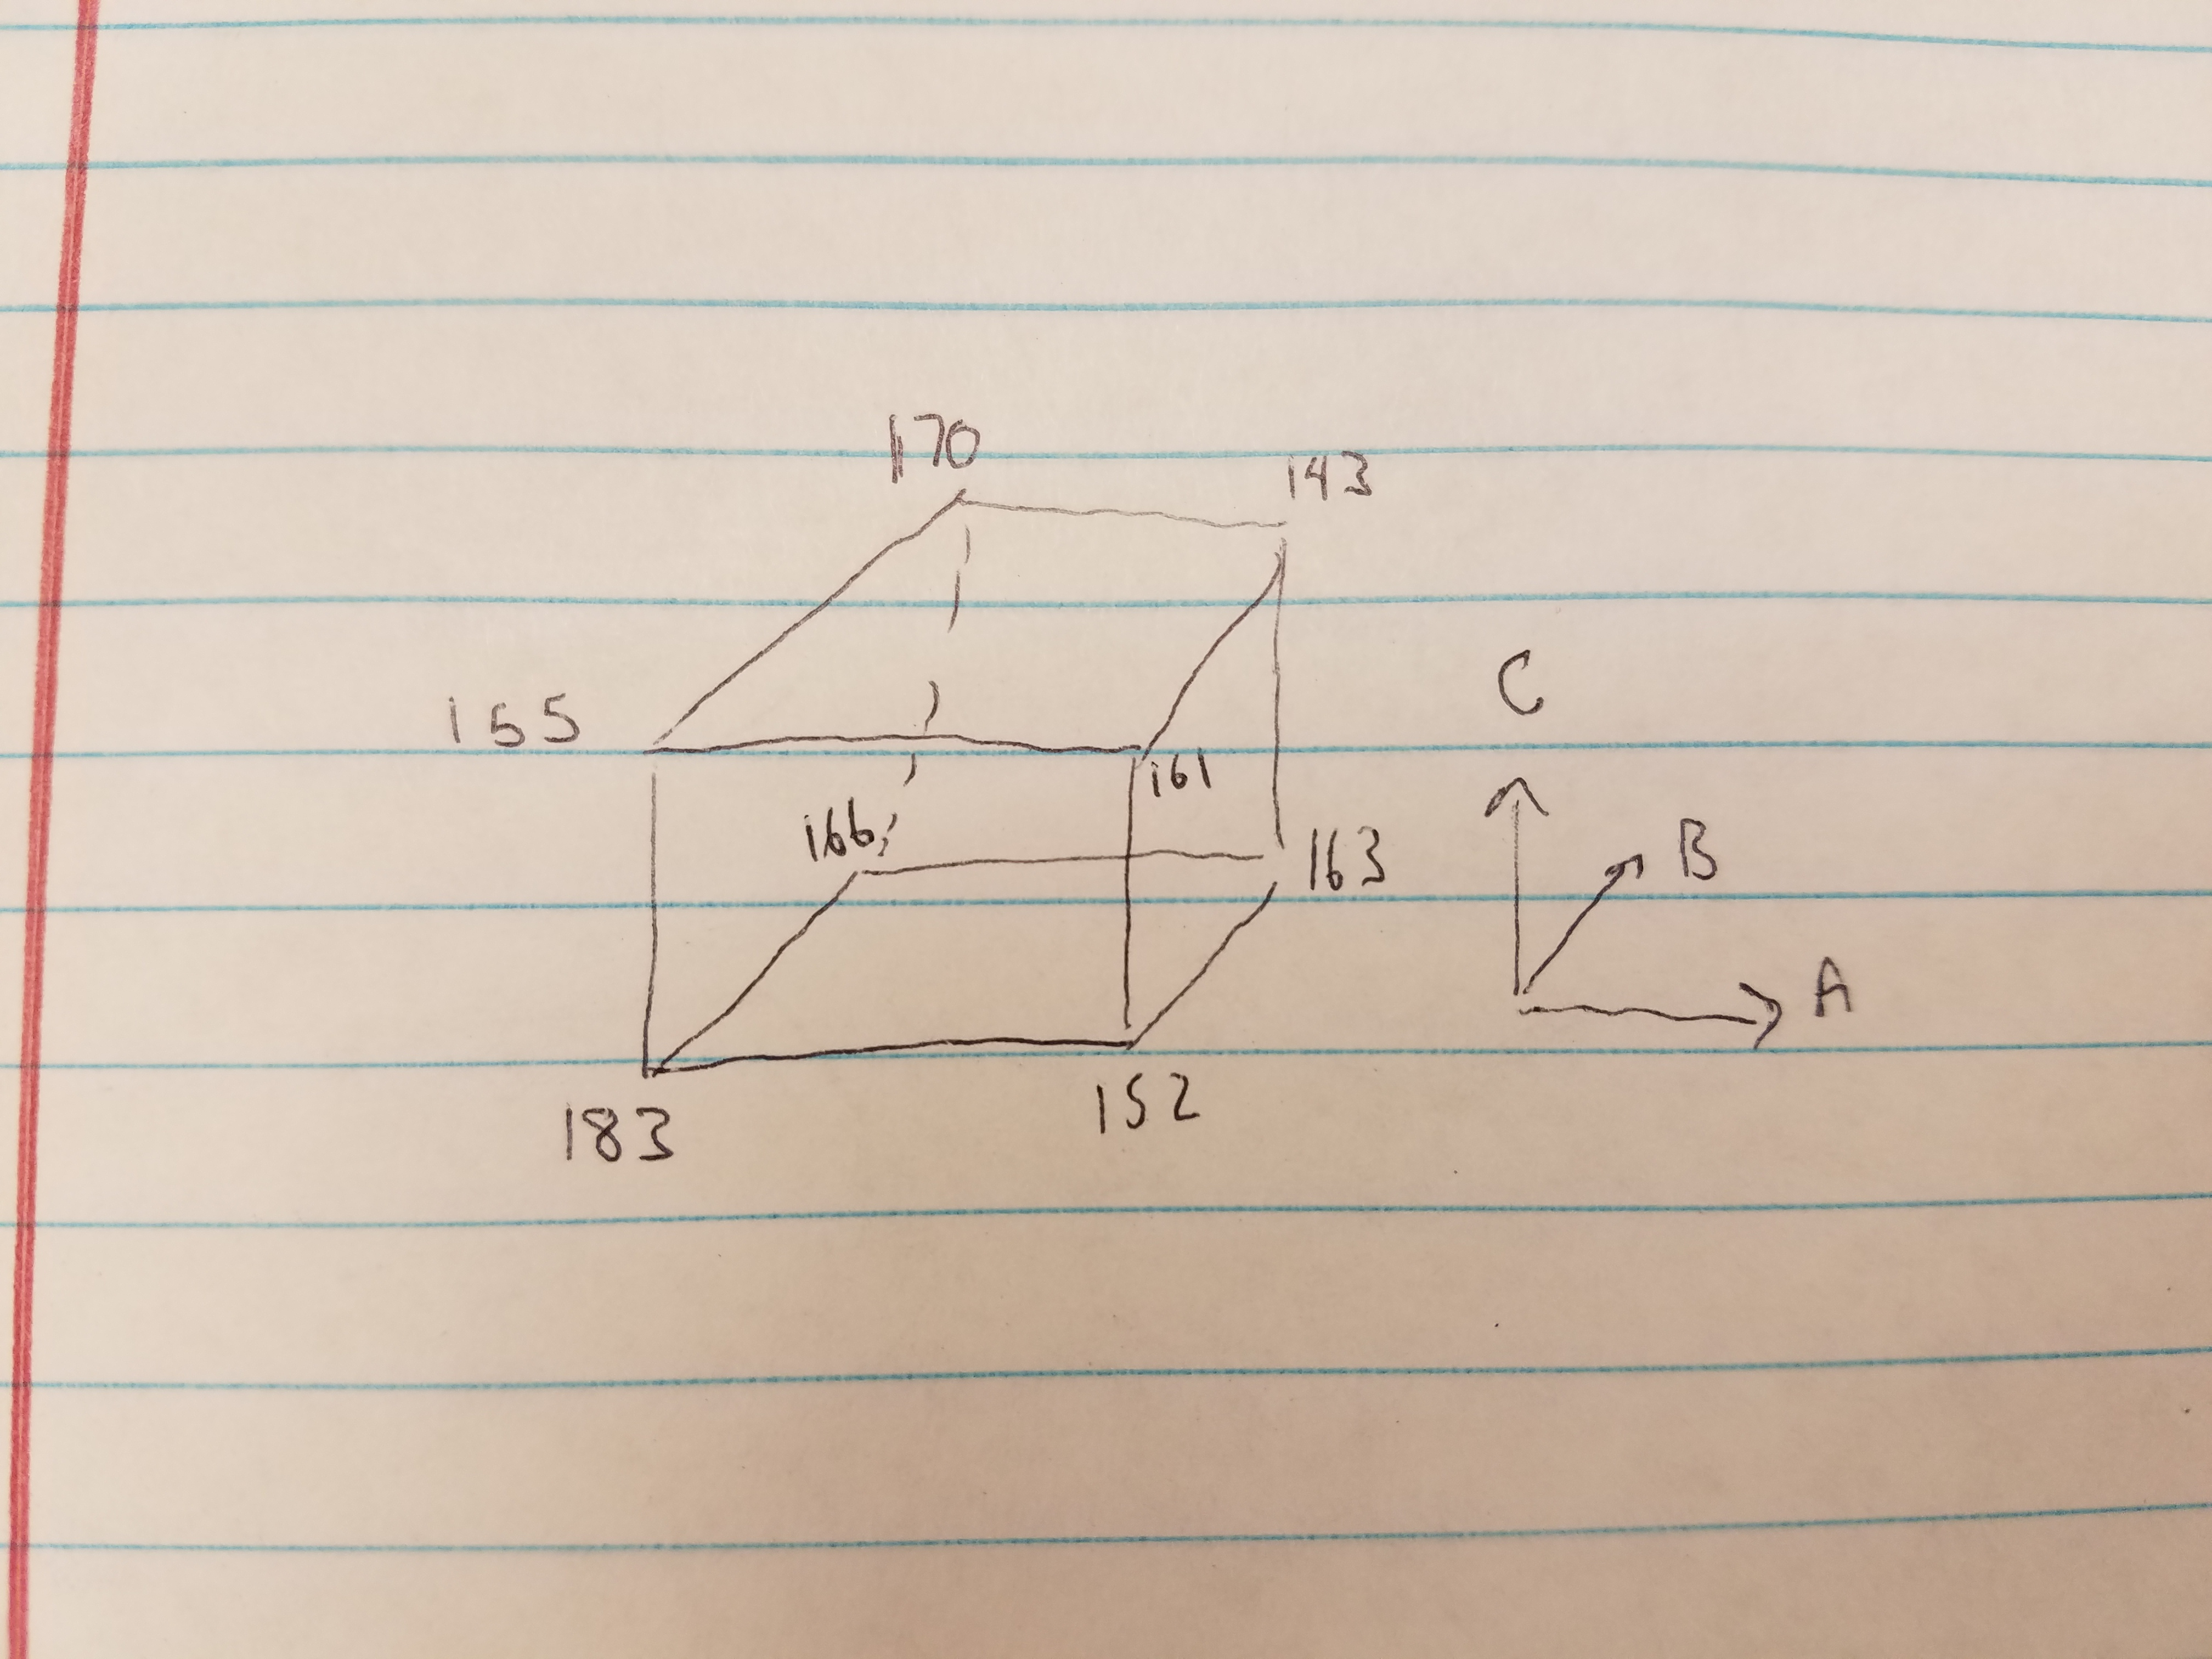

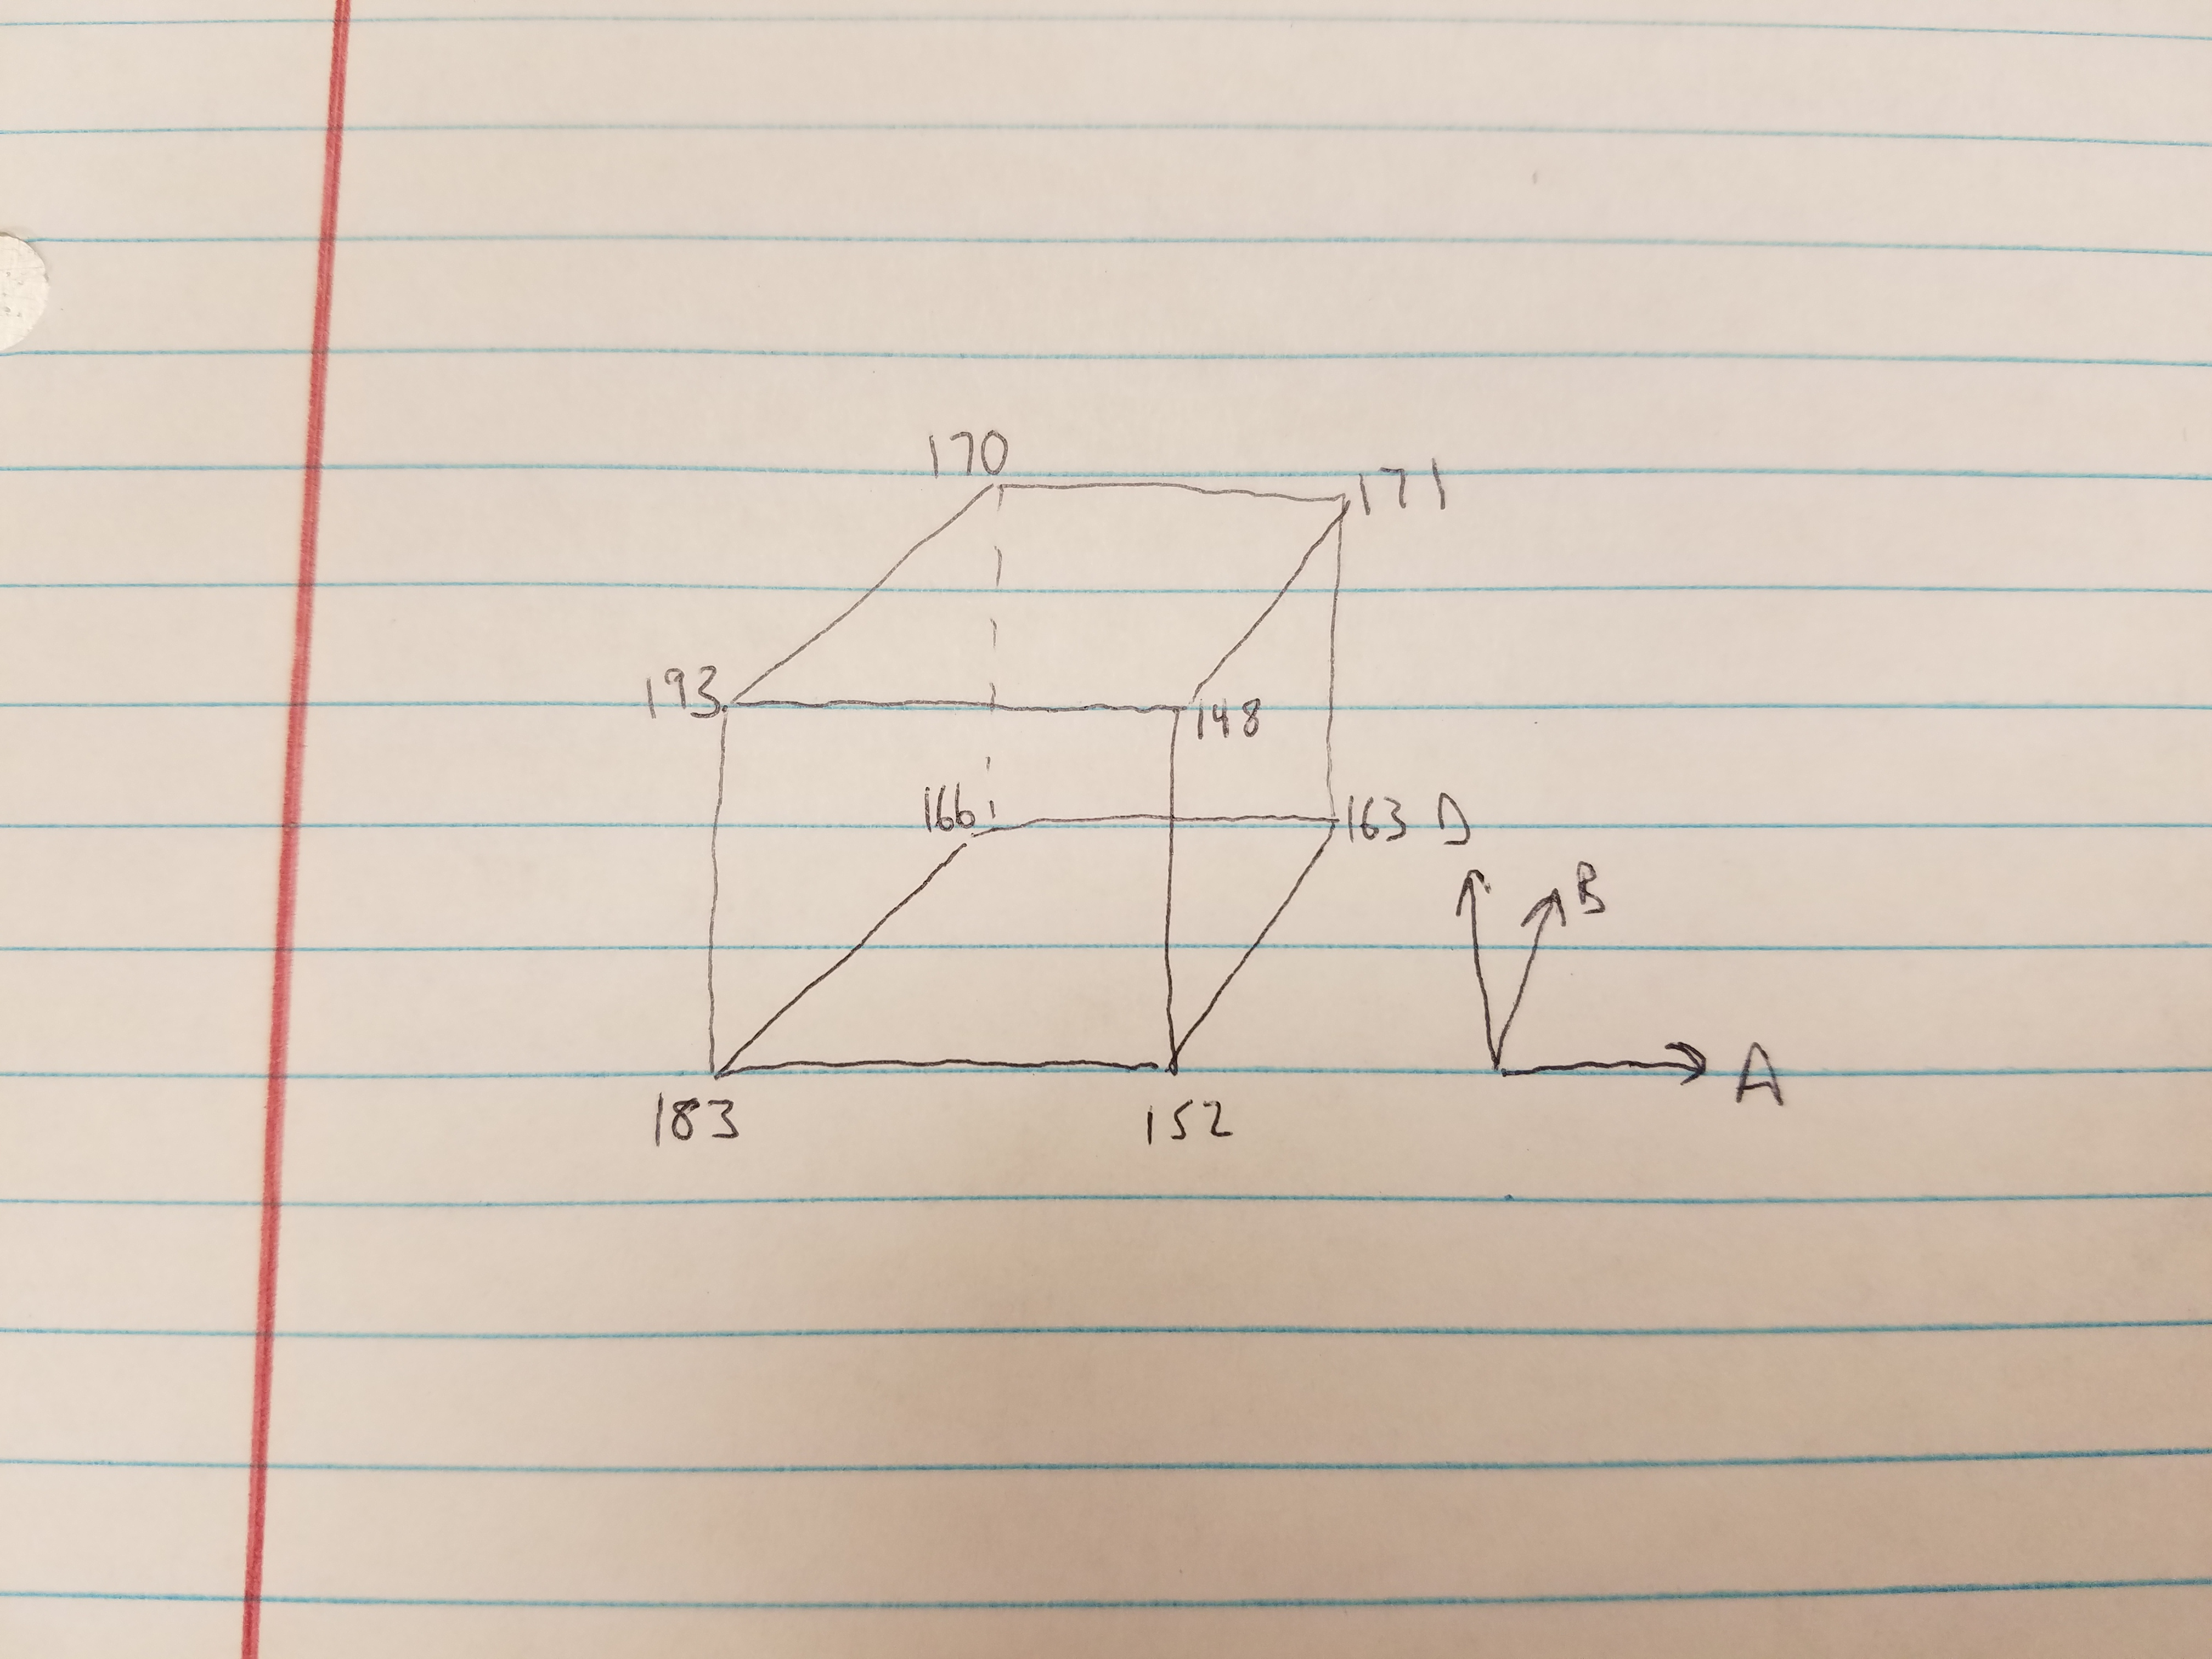

In [75]:
from IPython.display import Image
display(Image(filename="cube_ABC.jpg"))
display(Image(filename="cube_ABD.jpg"))

Examining the cube plots doesn't really show us much as far as interpretation. 

## 7.5

We are splitting the data from the first replicate of problem 6.11 into two blocks and confounding the $ABCD$ interaction effect. This means that we assign the treatment combinations that are + in the $ABCD$ column to block 1 and the combinations that are - to block 2. 


	               	Effect Estimate		Sum of Squares 
	A              	   -10.000	   400.000
	B              	    -0.750	     2.250
	AB             	     4.500	    81.000
	C              	    -0.750	     2.250
	AC             	     0.500	     1.000
	BC             	    -1.250	     6.250
	ABC            	    -6.000	   144.000
	D              	     5.000	   100.000
	AD             	    -3.750	    56.250
	BD             	    -1.500	     9.000
	ABD            	     4.750	    90.250
	CD             	     1.500	     9.000
	ACD            	    -0.250	     0.250
	BCD            	    -2.000	    16.000
	Block (ABCD)   	     3.250	    42.250


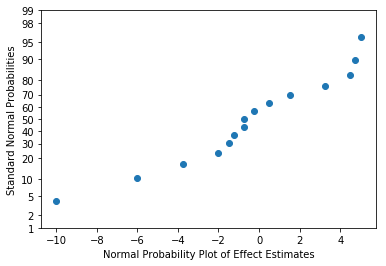

Sum of Squares  Degrees of Freedom  Mean Square        F0  \
A                     400.00                 1.0   400.000000   47.5248   
B                       2.25                 1.0     2.250000  0.267327   
AB                     81.00                 1.0    81.000000   9.62376   
C                       2.25                 1.0     2.250000  0.267327   
AC                      1.00                 1.0     1.000000  0.118812   
BC                      6.25                 1.0     6.250000  0.742574   
ABC                   144.00                 1.0   144.000000   17.1089   
D                     100.00                 1.0   100.000000   11.8812   
AD                     56.25                 1.0    56.250000   6.68317   
BD                      9.00                 1.0     9.000000   1.06931   
ABD                    90.25                 1.0    90.250000   10.7228   
Block (ABCD)           42.25                 1.0    42.250000    5.0198   
Model                 892.25                11.0    81.113636   9.63726   
Error                  25.25                 3.0     8.416667             
Total                 959.75                15.0     1.000000             

             F Threshold     p-value  
A                 10.128  0.00625365  
B                 10.128    0.640833  
AB                10.128   0.0532033  
C                 10.128    0.640833  
AC                10.128    0.753076  
BC                10.128    0.452211  
ABC               10.128   0.0256477  
D                 10.128   0.0410289  
AD                10.128   0.0814131  
BD                10.128    0.377152  
ABD               10.128   0.0466163  
Block (ABCD)      10.128    0.110911  
Model            8.76333   0.0438497  
Error                                 
Total

In [76]:
block_1 = np.array([one[0], ab[0], ac[0], bc[0], ad[0], bd[0], cd[0], abcd[0]])
block_2 = np.array([a[0], b[0], c[0], d[0], abc[0], bcd[0], acd[0], abd[0]])
num_blocks = 2
block_effect = np.mean(block_1) - np.mean(block_2)
block_df = num_blocks - 1
SSBlocks = (np.sum(block_1)**2 + np.sum(block_2)**2)/8 - (np.sum(block_1+block_2)**2)/(num_blocks*8)

one = np.array([90.])
a = np.array([74.])
b = np.array([81.])
ab = np.array([83.])
c = np.array([77.])
ac = np.array([81.])
bc = np.array([88.])
abc = np.array([73.])
d = np.array([98.])
ad = np.array([72.])
bd = np.array([87.])
abd = np.array([85.])
cd = np.array([99.])
acd = np.array([79.])
bcd = np.array([87.])
abcd = np.array([80.])
total = np.array([one, a, b, ab, c, ac, bc, abc,
                  d, ad, bd, abd, cd, acd, bcd, abcd])
total_mean = total.mean()

n=1
k=4


contrast_A = np.sum(-one + a - b + ab - c + ac - bc + abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_B = np.sum(-one - a + b + ab - c - ac + bc + abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_AB = np.sum(one - a - b + ab + c - ac - bc + abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_C = np.sum(-one - a - b - ab + c + ac + bc + abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_AC = np.sum(one - a + b - ab - c + ac - bc + abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BC = np.sum(one + a - b - ab - c - ac + bc + abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABC= np.sum(-one+ a + b - ab + c - ac - bc + abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrast_D =  np.sum(-one- a - b - ab - c - ac - bc - abc + d + ad + bd + abd + cd + acd + bcd + abcd)
contrast_AD=  np.sum(one - a + b - ab + c - ac + bc - abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_BD = np.sum(one + a - b - ab + c + ac - bc - abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_ABD= np.sum(-one + a + b - ab - c + ac + bc - abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_CD = np.sum(one + a + b + ab - c - ac - bc - abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_ACD = np.sum(-one + a - b + ab + c - ac + bc - abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BCD = np.sum(-one - a + b + ab + c + ac - bc - abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABCD = np.sum(one - a - b + ab - c + ac + bc - abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrasts_all = np.array([contrast_A, contrast_B, contrast_AB, contrast_C, contrast_AC, contrast_BC, contrast_ABC,
                         contrast_D, contrast_AD, contrast_BD, contrast_ABD, contrast_CD, contrast_ACD, contrast_BCD,
                         contrast_ABCD])



# Effects
names = ['A', 'B', 'AB', 'C', 'AC', 'BC', 'ABC', 'D', 'AD', 'BD', 'ABD', 'CD', 'ACD', 'BCD', 'Block (ABCD)', 'Model', 'Error', 'Total']
num_effects = np.power(2,k)-1 # 
effects = np.ones(num_effects)
for i in range(num_effects-1):
    effects[i] = contrasts_all[i]/(n*np.power(2,k-1))
effects[num_effects-1] = block_effect

# Sum Squares
num_elements = num_effects+3
sum_squares = np.ones(num_elements) #All effects plus error and total
for i in range(num_effects-1):
    sum_squares[i] = np.square(contrasts_all[i])/(n*np.power(2,k)) 
sum_squares[num_effects-1] = SSBlocks
SSModel = np.sum(sum_squares[:num_effects-1]) - sum_squares[12]-sum_squares[13]-sum_squares[11] #Ignore the AC, BC, and BD effects
#print(sum_squares[4],sum_squares[5],sum_squares[9])
SST = np.sum(np.square(total - total_mean))
SSE = SST - SSBlocks - SSModel
sum_squares[num_effects] = SSModel
sum_squares[num_effects+1] = SSE
sum_squares[num_effects+2] = SST

DF = np.ones(num_elements)
total_df = n*np.power(2,k)-1

model_df = np.sum(DF[:num_effects]) - 4 #Ignore the AC, BC, and BD effects
error_df = total_df - block_df - model_df 
DF[num_effects] = model_df
DF[num_effects+1] = error_df# Error DoF - 1 for the blocks
DF[num_effects+2] = total_df # Total DoF

print("\t{:15s}\t{:15s}\t\t{:15s}".format("","Effect Estimate", "Sum of Squares"))
for x in range(num_effects):
    print("\t{:15s}\t{:-10.3f}\t{:-10.3f}".format(names[x], effects[x], sum_squares[x]))

# Normplot of effects   

fig = plt.figure(figsize=(6,4))
probscale.probplot(effects,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Effect Estimates")
plt.show()


# Mean Squares

mean_squares = np.ones(num_elements)
for i in range(num_elements-1):
    mean_squares[i] = sum_squares[i]/DF[i]

# F Vals & p-vals
f_vals = np.ones(num_elements)
f_vals[num_effects:] = 0

f_crits = np.ones(num_elements)
f_crits[num_effects:] = 0

p_vals = np.ones(num_elements)
p_vals[num_effects:] = 0

MSE = mean_squares[num_effects+1]
DFE = DF[num_effects+1]
for i in range(num_effects+1):
    F0 = mean_squares[i]/MSE
    f_vals[i] = F0
    f_crits[i] = stats.f.ppf(1-alpha,DF[i],DFE)
    p_vals[i] = 1 - stats.f.cdf(F0, DF[i],DFE)


vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
vals_df = vals_df.drop(['CD','ACD','BCD'])
display(vals_df)
    


#### Answer: 
We removed effects CD, ACD, and BCD to allow for error degrees of freedom. Examining the results of the ANOVA we see that the significant effects are $A,AB,ABC,D, ABD$. Additionally, we see that the effect of the model is significant. 

## 7.21

$2^6$ design implies we have factors $A, B, C, D, E, and F$. The effects to be confounded are $ABCD$, $ACE$, and $ABEF$. We have 8 blocks so each block will contain 8 runs each. 

To find the other effects confounded with blocks, we find the generalized interactions of the effects to be confounded. They are the following:

$$(ABEF)(ABCD) =  A^2B^2CDEF = CDEF$$
$$ (ABEF)(ACE) = A^2BCEF = BCEF$$
$$ (ABCD)(ACE) = A^2BC^2DE = BDE$$
$$ (ABEF)(ABCD)(ACE) = A^3B^2C^2DE^2F = ADF$$


#### Design

For the design we have three contrast equations 

$$L_1 = x_1 + x_2 + x_3 + x_4$$ 
$$L_2 = x_1 + x_3 + x_5$$
$$L_3 = x_1 + x_2 + x_5 + x_6$$

Now, all of the treatments will yield a particular pair of values of $L_1$ (mod 2), $L_2$ (mod 2), and $L_3$ (mod 3). The treatment combinations that yield the same values of ($L_1, L_2, L_3$) will be assigned to the same block.

$$L_1 = 0, L_2 = 0, L_3 = 0 $$ 
$$L_1 = 1, L_2 = 0, L_3 = 0 $$
$$L_1 = 0, L_2 = 1, L_3 = 0 $$
$$L_1 = 1, L_2 = 1, L_3 = 0 $$
$$L_1 = 0, L_2 = 0, L_3 = 1 $$
$$L_1 = 1, L_2 = 0, L_3 = 1 $$
$$L_1 = 0, L_2 = 1, L_3 = 1 $$
$$L_1 = 1, L_2 = 1, L_3 = 1 $$



We know that the principal block contains the (1) treatment and each block will contain one of the other elements of the first 7 treatments.

Additionally, we know that abcd satisfies ($L_1, L_2, L_3$) = (0,0,0) so it also belongs in the principal block. We can then multiply each element of each of the other blocks by $abcd$ to identify the elements in the second row of each block.

Taking $L_1 + L_2 + L_3 = 0 $ (mod 2) yields $x_1 + x_4 + x_6 = 0$ which tells us that $x_2 + x_3 + x_5 = bce$ satisfies ($L_1, L_2, L_3$) = (0,0,0). So bce also belongs in the principal block.

Taking $L_2 + L_3 = 0$ (mod 2) yields $x_2 + x_3 + x_6 = 0$ which tells us that $x_1 + x_4 + x_5 = ade$ is another member of the principal block. 

Taking $L_1 + L_2 = 0$ (mod 2) yields $x_2 + x_4 + x_5 =0$ which tells us that $x_1 + x_3 + x_6 = acf$ is another member of the principal block.

Using the group theoretic properties of the principal block we know that we can multiply any 2 elements of the principal block and get another element of the principal block. Multiplying $(acf*abcd)$ yields $bdf$ as another member of the principal block.

Multiplying $(bce * acf)$ yields $abef$ as another member of the principal block. Finally, multiplying $abcd * abef$ yields $cdef$ as the last member of the principal block. We can find all the other elements of each block by multiplying the first item in the treatment by each element of the principal block. The full block design is shown below.

| Block 1 | Block 2 | Block 3 | Block 4 | Block 5 | Block 6 | Block 7 | Block 8 |
|---------|---------|---------|---------|---------|---------|---------|---------|
| b       | abc     | a       | c       | ac      | (1)     | bc      | ab      |
| acd     | d       | bcd     | abd     | bd      | abcd    | ad      | cd      |
| ce      | ae      | abce    | be      | abe     | bce     | e       | ace     |
| abde    | bcde    | de      | acde    | cde     | ade     | abcde   | bde     |
| abcf    | abf     | cf      | af      | f       | acf     | abf     | bcf     |
| df      | acdf    | abdf    | bcdf    | abcdf   | bdf     | cdf     | adf     |
| aef     | cef     | bef     | abcef   | bcef    | abef    | acef    | ef      |
| bcdef   | abdef   | acdef   | def     | adef    | cdef    | bdef    | abcdef  |

## 8.3

### Solution

We use a one half fractional design here and for maximum resolution we use $ABC$ as the generator. This yields the following $2^{3-1}$ alias structure

| Effect | Alias |
|--------|-------|
| a*abc  | bc    |
| b*abc  | ac    |
| c*abc  | ab    |

Since we have main effects aliased with two factor interactions, that makes this a resolution $III$ design. Since we have +$ABC$ as our generator, the treatments that will be used in this design are: $a, b, c, abc$.


In [77]:
a = np.array([669., 650.])
b = np.array([633., 601.])
c = np.array([1037., 1052.])
abc = np.array([729., 860.])

total = np.array([a,b,c, abc])
total_mean = np.mean(total)
n=2
k=3

contrast_A = np.sum(a - b - c + abc)
contrast_B = np.sum(-a + b - c + abc)
contrast_C = np.sum(-a - b + c + abc)
print(contrast_A,contrast_B, contrast_C)

SSA = (contrast_A**2)/(n*np.power(2,k-1))
SSB = (contrast_B**2)/(n*np.power(2,k-1))
SSC = (contrast_C**2)/(n*np.power(2,k-1))
SST = np.sum(np.square(total - total_mean))
SSE = SST - SSA - SSB - SSC
SSModel = SSA + SSB + SSC
sum_squares = np.array([SSA, SSB, SSC, SSModel, SSE, SST])

# Degrees of Freedom
total_df = np.power(2,k)-1
model_df = 3
error_df = total_df - model_df
num_elements = np.power(2,k-1)+2
DF = np.ones(num_elements)
DF[num_elements-1] = total_df
DF[num_elements-2] = error_df
DF[num_elements - 3] = model_df
names = ['A', 'B', 'C', 'Model', 'Error', 'Total']
num_effects = np.power(2,k-1)-1

mean_squares = np.ones(num_elements)
mean_squares[num_elements-1] = 0
for i in range(num_elements-1):
    mean_squares[i] = sum_squares[i]/DF[i]

f_vals = np.ones(num_elements)
f_vals[num_effects+1:] = 0
f_crits = np.ones(num_elements)
f_crits[num_effects+1:] = 0
p_vals = np.ones(num_elements)
p_vals[num_effects+1:] = 0
    
MSE = mean_squares[num_effects+1]
DFE = DF[num_effects+1]
for i in range(num_effects+1):
    F0 = mean_squares[i]/MSE
    f_vals[i] = F0
    f_crits[i] = stats.f.ppf(1-alpha,DF[i],DFE)
    p_vals[i] = 1 - stats.f.cdf(F0, DF[i],DFE)
    
vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)
    

-415.0 -585.0 1125.0


Sum of Squares  Degrees of Freedom Mean Square       F0 F Threshold  \
A           21528.125                 1.0     21528.1  9.17506     7.70865   
B           42778.125                 1.0     42778.1  18.2316     7.70865   
C          158203.125                 1.0      158203  67.4245     7.70865   
Model      222509.375                 3.0     74169.8  31.6104     6.59138   
Error        9385.500                 4.0     2346.38                        
Total      231894.875                 7.0                                    

          p-value  
A       0.0388173  
B       0.0129517  
C      0.00119881  
Model  0.00302963  
Error              
Total

C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


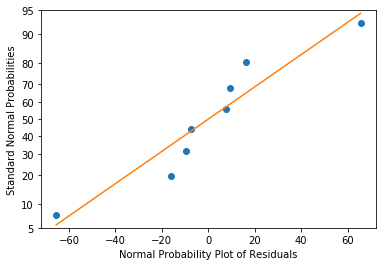

In [78]:
treat_means = np.mean(total, axis=1)
resid = np.zeros((total.shape))

for j in range(n):
    resid[:,j] = total[:,j] - treat_means
fig = plt.figure(figsize=(6,4))
probscale.probplot(resid,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=True)
plt.xlabel("Normal Probability Plot of Residuals")
plt.show()

#### Answer

Examining the results of the ANOVA, we see that each of the main effects is significant and the effect of the model is also significant.

## 8.10

#### Alias Structure
Examining the contrast constant table, we see that the $D$ column does not follow the normal pattern and instead follows the pattern for $ABCD$. This tells us that $ABCD$ is the generator here and there is only one generator since this is a half fractional factorial design. We know this because the contrast table has 16 entries which is $2^{5-1}$. The alias structure is shown in the table below.

| Effect  | Alias |
|---------|-------|
| A*ABCD  | BCD   |
| B*BCD   | ACD   |
| C*ABCD  | ABD   |
| D*ABCD  | ABC   |
| E*ABCD  | ABCDE |
| AB*ABCD | CD    |
| AC*ABCD | BD    |
| BC*ABCD | AD    |
| AE*ABCD | BCDE  |
| BE*ABCD | ACDE  |
| CE*ABCD | ABDE  |
| DE*ABCD | ABCE  |
| ABE*ABCD| CDE   |
| ACE*ABCD| BDE   |
| BCE*ABCD| ADE   |

This is a resolution $IV$ design since we have main effects aliased with 3 factor or greater effects and all two factor interactions are aliased with other two factor interactions.

### b)




Name      	Effect    	Sum of Squares
A         	  0.242083	  0.703252
B         	 -0.163750	  0.321769
C         	 -0.049583	  0.029502
D         	  0.091250	  0.099919
E         	 -0.238750	  0.684019
AB        	 -0.029583	  0.010502
AC        	  0.001250	  0.000019
BC        	 -0.022917	  0.006302
AE        	  0.063750	  0.048769
BE        	  0.152917	  0.280602
CE        	 -0.032917	  0.013002
DE        	  0.039583	  0.018802
ABE       	  0.002083	  0.000052
ACE       	  0.019583	  0.004602
BCE       	 -0.059583	  0.042602


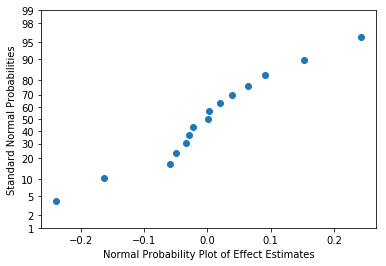

Sum of Squares  Degrees of Freedom  Mean Square           F0  \
A            0.703252                 1.0     0.703252      35.8878   
B            0.321769                 1.0     0.321769      16.4203   
C            0.029502                 1.0    0.0295021      1.50553   
D            0.099919                 1.0    0.0999187      5.09898   
E            0.684019                 1.0     0.684019      34.9063   
AB           0.010502                 1.0    0.0105021     0.535935   
AC           0.000019                 1.0    1.875e-05  0.000956836   
BC           0.006302                 1.0   0.00630208     0.321603   
AE           0.048769                 1.0    0.0487688      2.48873   
BE           0.280602                 1.0     0.280602      14.3195   
CE           0.013002                 1.0    0.0130021     0.663513   
DE           0.018802                 1.0    0.0188021     0.959494   
ABE          0.000052                 1.0  5.20833e-05   0.00265788   
ACE          0.004602                 1.0   0.00460208      0.23485   
BCE          0.042602                 1.0    0.0426021      2.17404   
Error        0.627067                32.0    0.0195958                
Total        2.890781                47.0                             

      F Threshold      p-value  
A          4.1491  1.11522e-06  
B          4.1491  0.000302392  
C          4.1491     0.228774  
D          4.1491    0.0308933  
E          4.1491  1.41622e-06  
AB         4.1491     0.469451  
AC         4.1491     0.975515  
BC         4.1491     0.574603  
AE         4.1491       0.1245  
BE         4.1491   0.00063972  
CE         4.1491     0.421343  
DE         4.1491     0.334662  
ABE        4.1491     0.959204  
ACE        4.1491     0.631251  
BCE        4.1491     0.150128  
Error                           
Total

In [79]:
data = np.array([[7.78, 8.15, 7.50, 7.59, 7.54, 7.69, 7.56, 7.56, 7.50, 7.88, 7.50, 7.63, 7.32, 7.56, 7.18, 7.81],
                 [7.78, 8.18, 7.56, 7.56, 8.00,8.09,7.52,7.81,7.25,7.88,7.56,7.75,7.44,7.69,7.18,7.50],
                 [7.81,7.88,7.50,7.75,7.88,8.06,7.44,7.69,7.12,7.44,7.50,7.56,7.44,7.62,7.25,7.59]])
data = data.T
data_mean = np.mean(data)
n=3
k=5
num_effects = np.power(2,k-1)-1
num_elements = num_effects+2

names=['A','B','C','D','E','AB','AC','BC','AE','BE','CE','DE','ABE','ACE','BCE', 'Error', 'Total']
contrast_A = np.sum(data[1::2]-data[0::2])
contrast_B = np.sum(data[2:4]+data[6:8]+data[10:12]+data[14:] - (data[0:2]+data[4:6]+data[8:10]+data[12:14]))
contrast_C = np.sum(data[4:8]+data[12:]-(data[0:4]+data[8:12]))
contrast_D = np.sum(data[1]+data[2]+data[4]+data[7]+data[9]+data[10]+data[12]+data[15] 
                   - (data[0]+data[3]+data[5]+data[6]+data[8]+data[11]+data[13]+data[14]))
contrast_E = np.sum(data[8:]-data[0:8])
contrast_AB = np.sum(data[0]+data[3]+data[4]+data[7]+data[8]+data[11]+data[12]+data[15]
                    -(data[1]+data[2]+data[5]+data[9]+data[10]+data[13]+data[14]+data[6]))
contrast_AC = np.sum(data[0]+data[2]+data[5]+data[7]+data[8]+data[10]+data[13]+data[15]
                    - (data[1]+data[3]+data[4]+data[6]+data[9]+data[11]+data[12]+data[14]))
contrast_BC = np.sum(data[0]+data[1]+data[6]+data[7]+data[8]+data[9]+data[14]+data[15]
                    - (data[2]+data[3]+data[4]+data[5]+data[11]+data[12]+data[10]+data[13]))
contrast_AE = np.sum(data[0]+data[2]+data[4]+data[6]+data[9]+data[11]+data[13]+data[15]
                    - (data[1]+data[3]+data[5]+data[7]+data[8]+data[10]+data[12]+data[14]))
contrast_BE = np.sum(data[0]+data[1]+data[4]+data[5]+data[10]+data[11]+data[14]+data[15]
                    - (data[2]+data[3]+data[6]+data[7]+data[8]+data[9]+data[12]+data[13]))
contrast_DE = np.sum(data[0]+data[3]+data[5]+data[6]+data[9]+data[10]+data[12]+data[15]
                    - (data[1]+data[2]+data[4]+data[7]+data[8]+data[11]+data[13]+data[14]))
contrast_CE = np.sum(data[0:4]+data[12:]
                    - (data[4:8]+data[8:12]))
contrast_ABE = np.sum(data[1]+data[2]+data[5]+data[6]+data[8]+data[11]+data[12]+data[15]
                    - (data[0]+data[3]+data[4]+data[7]+data[9]+data[10]+data[13]+data[14]))
contrast_ACE = np.sum(data[1]+data[3]+data[4]+data[6]+data[8]+data[10]+data[13]+data[15]
                    - (data[0]+data[2]+data[5]+data[7]+data[9]+data[11]+data[12]+data[14]))
contrast_BCE = np.sum(data[2]+data[3]+data[4]+data[5]+data[8]+data[9]+data[14]+data[15]
                    - (data[0]+data[1]+data[6]+data[7]+data[10]+data[11]+data[12]+data[13]))
contrasts_all = np.array([contrast_A, contrast_B, contrast_C, contrast_D, contrast_E, contrast_AB, contrast_AC,
                         contrast_BC, contrast_AE, contrast_BE, contrast_CE, contrast_DE, contrast_ABE, contrast_ACE, contrast_BCE])

# Effects
effects = np.ones(num_elements)
for i in range(num_effects):
    effects[i] = contrasts_all[i]/(n*np.power(2,k-2))


# Sum of Squares
SST = np.sum(np.square(data-data_mean))
sum_squares = np.ones(num_elements)
for i in range(num_effects):
    sum_squares[i] = (contrasts_all[i]**2)/(n*np.power(2,k-1))
SSE = SST - np.sum(sum_squares[:num_effects])
sum_squares[num_elements-2] = SSE
sum_squares[num_elements-1] = SST

print("{:10s}\t{:10s}\t{:10s}".format("Name","Effect","Sum of Squares"))
for i in range(num_effects):
    print("{:10s}\t{:-10.6f}\t{:-10.6f}".format(names[i],effects[i],sum_squares[i]))

probscale.probplot(effects[:num_effects],  plottype='prob',probax='y',
                             problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Effect Estimates")
plt.show()

# Degrees of Freedom
DF = np.ones(num_elements)
total_df = n*np.power(2,k-1)-1
error_df = total_df - np.sum(DF[:num_effects])
DF[num_elements-2] = error_df
DF[num_elements-1] = total_df


#SSModel = sum_squares[0]+ sum_squares[1]+ sum_squares[2]+ sum_squares[4]+sum_squares[7]+sum_squares[9]+sum_squares[14]+sum_squares[10]

mean_squares = np.ones(num_elements)
mean_squares[num_elements-1] = 0
for i in range(num_elements-1):
    mean_squares[i] = sum_squares[i]/DF[i]

f_vals = np.ones(num_elements)
f_vals[num_effects:] = 0
f_crits = np.ones(num_elements)
f_crits[num_effects:] = 0
p_vals = np.ones(num_elements)
p_vals[num_effects:] = 0
    
MSE = mean_squares[num_elements-2]
DFE = DF[num_elements-2]
for i in range(num_effects):
    F0 = mean_squares[i]/MSE
    f_vals[i] = F0
    f_crits[i] = stats.f.ppf(1-alpha,DF[i],DFE)
    p_vals[i] = 1 - stats.f.cdf(F0, DF[i],DFE)
    
vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)




#### Answer

Examining the results of the ANOVA, we see that the significant factors are $A, B, D, E, BE$.

### c)

In [80]:
print("{:10s}\t{:10s}\t{:10s}".format("Effect","Range","Std. Dev."))
for i in range(num_effects):
    print("{:10s}\t{:10.6f}\t{:10.6f}".format(names[i],np.max(data[i])-np.min(data[i]),data[i].std()))

Effect    	Range     	Std. Dev. 
A         	  0.030000	  0.014142
B         	  0.300000	  0.134907
C         	  0.060000	  0.028284
D         	  0.190000	  0.083400
E         	  0.460000	  0.194822
AB        	  0.400000	  0.181904
AC        	  0.120000	  0.049889
BC        	  0.250000	  0.102089
AE        	  0.380000	  0.157692
BE        	  0.440000	  0.207418
CE        	  0.060000	  0.028284
DE        	  0.190000	  0.078457
ABE       	  0.120000	  0.056569
ACE       	  0.130000	  0.053125
BCE       	  0.070000	  0.032998


#### Answer

Examining the ranges and standard deviations, we see that most are in the same ballpark. However, A, C, CE, and BCE are all significantly lower than the rest. 

### d)


C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


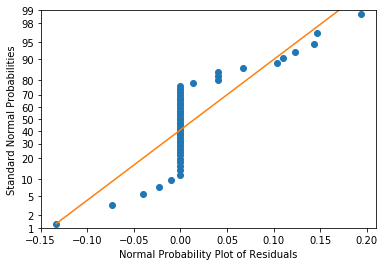

In [81]:
resid = np.zeros((data.shape))
treatment_means = np.mean(data, axis=1)
for i in range(n):
    resid[:,j] = data[:,j]-treatment_means
probscale.probplot(resid,  plottype='prob',probax='y',
                             problabel='Standard Normal Probabilities', bestfit=True)
plt.xlabel("Normal Probability Plot of Residuals")
plt.show()


#### Answer

Examining the residuals we see that there is a large number of residuals that are right around zero. Transformation of the data may help ANOVA perform better.

### e)

#### Answer

This is not the most high resolution design. If we use $ABCDE$ as the generator we get the following alias structure

| Effect  | Alias |
|---------|-------|
| A*ABCDE  | BCDE   |
| B*BCDE   | ACDE   |
| C*ABCDE  | ABDE   |
| D*ABCDE  | ABCE   |
| E*ABCDE  | ABCD  |
| AB*ABCDE | CDE    |
| AC*ABCDE | BDE    |
| BC*ABCDE | AED    |
| AD*ABCDE | BCE    |
| AE*ABCDE | BCD  |
| BD*ABCDE | ACE    |
| BE*ABCDE | ACD  |
| CD*ABCDE | ABE    |
| CE*ABCDE | ABD  |
| DE*ABCDE | ABC  |

Using this generator, we are able to achieve a resolution $V$ design. No main effects or two factor interactions are aliased with any other main effects or two factor interactions.